In [79]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [80]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [81]:
NUM_CLASSES = 5

# Dataset reading

In [82]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [83]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [86]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [88]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [89]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - accuracy: 0.2031 - loss: 1.5845
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.1941 - loss: 1.6024 - val_accuracy: 0.0946 - val_loss: 1.5976
Epoch 2/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2109 - loss: 1.5811
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2052 - loss: 1.5834 - val_accuracy: 0.0946 - val_loss: 1.5643
Epoch 3/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2344 - loss: 1.6230
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2240 - loss: 1.5862 - val_accuracy: 0.2432 - val_loss: 1.5350
Epoch 4/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2578 - loss: 1.5478
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2548 - loss: 1.5301 - val_accuracy: 0.3176 - val_loss: 1.5080
Epoch 5/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2969 - loss: 1.4863
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2826 - loss: 1.5072 - val_accuracy: 0.4392 - val_loss: 1.4846
Epoch 6/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2344 - loss: 1.5977
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2800 - loss: 1.5295 - val_accuracy: 0.4932 - val_loss: 1.4654
Epoch 7/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3125 - loss: 1.5098
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3338 - loss: 1.4810 - val_accuracy: 0.5203 - val_loss: 1.4464
Epoch 8/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2422 - loss: 1.5778
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2967 - loss: 1.5203 - val_accuracy: 0.5473 - val_loss: 1.4286
Epoch 9/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2891 - loss: 1.4722
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3358 - loss: 1.4586 - val_accuracy: 0.5743 - val_loss: 1.4105
Epoch 10/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3750 - loss: 1.4174
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3806 - loss: 1.4378 - val_accuracy: 0.5743 - val_loss: 1.3925
Epoch 11/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3594 - loss: 1.4200
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3492 - loss: 1.4325 - val_accuracy: 0.5811 - val_loss: 1.3742
Epoch 12/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3906 - loss: 1.4322
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4094 - loss: 1.4179 - val_accuracy: 0.5811 - val_loss: 1.3558
Epoch 13/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4453 - loss: 1.4153
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4370 - loss: 1.4081 - val_accuracy: 0.5743 - val_loss: 1.3369
Epoch 14/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4375 - loss: 1.3868
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4337 - loss: 1.3804 - val_accuracy: 0.6081 - val_loss: 1.3175
Epoch 15/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5391 - loss: 1.3353
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4853 - loss: 1.3584 - val_accuracy: 0.6284 - val_loss: 1.2972
Epoch 16/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4375 - loss: 1.3493
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4688 - loss: 1.3259 - val_accuracy: 0.6419 - val_loss: 1.2759
Epoch 17/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4844 - loss: 1.3016
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4875 - loss: 1.3234 - val_accuracy: 0.6486 - val_loss: 1.2547
Epoch 18/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.2864
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5023 - loss: 1.3116 - val_accuracy: 0.6554 - val_loss: 1.2335
Epoch 19/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5547 - loss: 1.2532
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5263 - loss: 1.2711 - val_accuracy: 0.6622 - val_loss: 1.2107
Epoch 20/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.2510
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5228 - loss: 1.2683 - val_accuracy: 0.6689 - val_loss: 1.1877
Epoch 21/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.2616
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5399 - loss: 1.2705 - val_accuracy: 0.7365 - val_loss: 1.1649
Epoch 22/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 1.2495
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5607 - loss: 1.2448 - val_accuracy: 0.7365 - val_loss: 1.1424
Epoch 23/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5469 - loss: 1.2753
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5594 - loss: 1.2570 - val_accuracy: 0.7365 - val_loss: 1.1208
Epoch 24/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5781 - loss: 1.2302
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5863 - loss: 1.2018 - val_accuracy: 0.7365 - val_loss: 1.0985
Epoch 25/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5234 - loss: 1.2578
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5571 - loss: 1.2271 - val_accuracy: 0.7365 - val_loss: 1.0771
Epoch 26/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6016 - loss: 1.1495
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6027 - loss: 1.1812 - val_accuracy: 0.7365 - val_loss: 1.0563
Epoch 27/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5859 - loss: 1.1716
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6071 - loss: 1.1689 - val_accuracy: 0.7365 - val_loss: 1.0353
Epoch 28/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6172 - loss: 1.1822
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6186 - loss: 1.1526 - val_accuracy: 0.7365 - val_loss: 1.0128
Epoch 29/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6484 - loss: 1.1121
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6240 - loss: 1.1281 - val_accuracy: 0.7365 - val_loss: 0.9902
Epoch 30/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5859 - loss: 1.1087
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6094 - loss: 1.1127 - val_accuracy: 0.7365 - val_loss: 0.9677
Epoch 31/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6641 - loss: 1.0735
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6380 - loss: 1.0935 - val_accuracy: 0.7365 - val_loss: 0.9447
Epoch 32/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6172 - loss: 1.1454
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6215 - loss: 1.1215 - val_accuracy: 0.7365 - val_loss: 0.9228
Epoch 33/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5391 - loss: 1.1777
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5991 - loss: 1.1027 - val_accuracy: 0.7365 - val_loss: 0.9019
Epoch 34/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6641 - loss: 0.9693
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6458 - loss: 1.0227 - val_accuracy: 0.7365 - val_loss: 0.8811
Epoch 35/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5781 - loss: 1.0744
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6114 - loss: 1.0513 - val_accuracy: 0.7365 - val_loss: 0.8615
Epoch 36/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.9844
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6483 - loss: 0.9985 - val_accuracy: 0.7365 - val_loss: 0.8408
Epoch 37/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6250 - loss: 1.0486
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6396 - loss: 1.0126 - val_accuracy: 0.7432 - val_loss: 0.8196
Epoch 38/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 0.9564
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6593 - loss: 0.9819 - val_accuracy: 0.7432 - val_loss: 0.7988
Epoch 39/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5859 - loss: 1.0462
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6319 - loss: 1.0043 - val_accuracy: 0.7432 - val_loss: 0.7799
Epoch 40/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6719 - loss: 0.9502
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6667 - loss: 0.9528 - val_accuracy: 0.7432 - val_loss: 0.7616
Epoch 41/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6406 - loss: 0.9544
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6320 - loss: 0.9614 - val_accuracy: 0.7432 - val_loss: 0.7449
Epoch 42/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6719 - loss: 0.8870
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6577 - loss: 0.9197 - val_accuracy: 0.7500 - val_loss: 0.7286
Epoch 43/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6719 - loss: 0.8946
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6600 - loss: 0.9148 - val_accuracy: 0.7500 - val_loss: 0.7115
Epoch 44/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6562 - loss: 0.9434
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6671 - loss: 0.9201 - val_accuracy: 0.7635 - val_loss: 0.6960
Epoch 45/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.8368
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6748 - loss: 0.8576 - val_accuracy: 0.7635 - val_loss: 0.6814
Epoch 46/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.8862
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6565 - loss: 0.8689 - val_accuracy: 0.7635 - val_loss: 0.6673
Epoch 47/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6719 - loss: 0.8400
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6612 - loss: 0.8476 - val_accuracy: 0.7635 - val_loss: 0.6541
Epoch 48/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.8761
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6790 - loss: 0.8814 - val_accuracy: 0.7703 - val_loss: 0.6429
Epoch 49/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.8262
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6890 - loss: 0.8357 - val_accuracy: 0.7703 - val_loss: 0.6318
Epoch 50/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6562 - loss: 0.9003
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6805 - loss: 0.8588 - val_accuracy: 0.7838 - val_loss: 0.6214
Epoch 51/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7109 - loss: 0.8210
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6892 - loss: 0.8259 - val_accuracy: 0.7905 - val_loss: 0.6110
Epoch 52/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6406 - loss: 0.8438
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6727 - loss: 0.8180 - val_accuracy: 0.7973 - val_loss: 0.6006
Epoch 53/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.7908
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6639 - loss: 0.8208 - val_accuracy: 0.8041 - val_loss: 0.5911
Epoch 54/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6094 - loss: 0.8835
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6714 - loss: 0.8214 - val_accuracy: 0.8041 - val_loss: 0.5821
Epoch 55/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.7207
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7107 - loss: 0.7604 - val_accuracy: 0.8041 - val_loss: 0.5736
Epoch 56/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.7755
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6886 - loss: 0.7824 - val_accuracy: 0.8041 - val_loss: 0.5651
Epoch 57/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.7702
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6850 - loss: 0.7460 - val_accuracy: 0.8041 - val_loss: 0.5570
Epoch 58/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6797 - loss: 0.8325
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6965 - loss: 0.7848 - val_accuracy: 0.8041 - val_loss: 0.5497
Epoch 59/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7910
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7087 - loss: 0.7710 - val_accuracy: 0.8108 - val_loss: 0.5437
Epoch 60/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6536
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7092 - loss: 0.7287 - val_accuracy: 0.8176 - val_loss: 0.5381
Epoch 61/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6513
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7088 - loss: 0.7019 - val_accuracy: 0.8243 - val_loss: 0.5324
Epoch 62/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7314
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6993 - loss: 0.7436 - val_accuracy: 0.8243 - val_loss: 0.5270
Epoch 63/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7109 - loss: 0.7183
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7009 - loss: 0.7250 - val_accuracy: 0.8243 - val_loss: 0.5220
Epoch 64/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.7375
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7072 - loss: 0.7369 - val_accuracy: 0.8243 - val_loss: 0.5159
Epoch 65/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7188 - loss: 0.7183
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6977 - loss: 0.7280 - val_accuracy: 0.8311 - val_loss: 0.5102
Epoch 66/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7031 - loss: 0.7308
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6896 - loss: 0.7307 - val_accuracy: 0.8311 - val_loss: 0.5049
Epoch 67/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7031 - loss: 0.7121
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7031 - loss: 0.7171 - val_accuracy: 0.8311 - val_loss: 0.4993
Epoch 68/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6953 - loss: 0.7241
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7073 - loss: 0.7247 - val_accuracy: 0.8311 - val_loss: 0.4942
Epoch 69/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7031 - loss: 0.7247
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7227 - loss: 0.6936 - val_accuracy: 0.8311 - val_loss: 0.4881
Epoch 70/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7344 - loss: 0.6494
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6957 - loss: 0.7085 - val_accuracy: 0.8311 - val_loss: 0.4827
Epoch 71/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6953 - loss: 0.7463
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6862 - loss: 0.7405 - val_accuracy: 0.8311 - val_loss: 0.4775
Epoch 72/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.6111
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7163 - loss: 0.6835 - val_accuracy: 0.8311 - val_loss: 0.4718
Epoch 73/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7031 - loss: 0.7285
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6996 - loss: 0.7026 - val_accuracy: 0.8311 - val_loss: 0.4659
Epoch 74/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6562 - loss: 0.6975
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6907 - loss: 0.6920 - val_accuracy: 0.8311 - val_loss: 0.4606
Epoch 75/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6875 - loss: 0.7115
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6935 - loss: 0.6919 - val_accuracy: 0.8311 - val_loss: 0.4569
Epoch 76/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6719 - loss: 0.7014
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7007 - loss: 0.6844 - val_accuracy: 0.8378 - val_loss: 0.4529
Epoch 77/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6174
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7212 - loss: 0.6536 - val_accuracy: 0.8649 - val_loss: 0.4466
Epoch 78/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7422 - loss: 0.5977
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6983 - loss: 0.6564 - val_accuracy: 0.8649 - val_loss: 0.4376
Epoch 79/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7188 - loss: 0.6972
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7345 - loss: 0.6545 - val_accuracy: 0.8649 - val_loss: 0.4284
Epoch 80/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.6772
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6991 - loss: 0.6605 - val_accuracy: 0.8649 - val_loss: 0.4189
Epoch 81/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.5963
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7317 - loss: 0.6230 - val_accuracy: 0.8716 - val_loss: 0.4096
Epoch 82/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6562 - loss: 0.7017
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7086 - loss: 0.6647 - val_accuracy: 0.8716 - val_loss: 0.4022
Epoch 83/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6484 - loss: 0.7336
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7027 - loss: 0.6824 - val_accuracy: 0.8784 - val_loss: 0.3965
Epoch 84/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.6536
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7191 - loss: 0.6278 - val_accuracy: 0.8784 - val_loss: 0.3905
Epoch 85/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6295
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7210 - loss: 0.6318 - val_accuracy: 0.8784 - val_loss: 0.3869
Epoch 86/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6298
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7294 - loss: 0.6343 - val_accuracy: 0.8986 - val_loss: 0.3816
Epoch 87/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7344 - loss: 0.6534
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7172 - loss: 0.6334 - val_accuracy: 0.8919 - val_loss: 0.3755
Epoch 88/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.6176
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7191 - loss: 0.6243 - val_accuracy: 0.8919 - val_loss: 0.3681
Epoch 89/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.5925
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7325 - loss: 0.6237 - val_accuracy: 0.8919 - val_loss: 0.3617
Epoch 90/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5536
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7485 - loss: 0.5924 - val_accuracy: 0.8986 - val_loss: 0.3551
Epoch 91/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.5894
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7461 - loss: 0.5950 - val_accuracy: 0.8986 - val_loss: 0.3501
Epoch 92/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5616
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7750 - loss: 0.5638 - val_accuracy: 0.8986 - val_loss: 0.3460
Epoch 93/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.5624
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7403 - loss: 0.5845 - val_accuracy: 0.8986 - val_loss: 0.3413
Epoch 94/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5034
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7554 - loss: 0.5379 - val_accuracy: 0.8986 - val_loss: 0.3351
Epoch 95/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7578 - loss: 0.5905
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7323 - loss: 0.6019 - val_accuracy: 0.8986 - val_loss: 0.3305
Epoch 96/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5000
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7630 - loss: 0.5403 - val_accuracy: 0.8986 - val_loss: 0.3271
Epoch 97/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6601
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7393 - loss: 0.6229 - val_accuracy: 0.8986 - val_loss: 0.3254
Epoch 98/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5698
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7479 - loss: 0.5817 - val_accuracy: 0.8986 - val_loss: 0.3228
Epoch 99/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5811
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7759 - loss: 0.5662 - val_accuracy: 0.8986 - val_loss: 0.3208
Epoch 100/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5470
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7569 - loss: 0.5524 - val_accuracy: 0.8986 - val_loss: 0.3177
Epoch 101/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.4916
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7448 - loss: 0.5572 - val_accuracy: 0.8986 - val_loss: 0.3136
Epoch 102/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7344 - loss: 0.5614
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7373 - loss: 0.5995 - val_accuracy: 0.8986 - val_loss: 0.3087
Epoch 103/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5969
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7403 - loss: 0.5837 - val_accuracy: 0.8986 - val_loss: 0.3068
Epoch 104/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5345
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7773 - loss: 0.5463 - val_accuracy: 0.8986 - val_loss: 0.3041
Epoch 105/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.5613
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7506 - loss: 0.5546 - val_accuracy: 0.8986 - val_loss: 0.3019
Epoch 106/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5273
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7714 - loss: 0.5285 - val_accuracy: 0.8986 - val_loss: 0.2978
Epoch 107/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5165
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7699 - loss: 0.5422 - val_accuracy: 0.8986 - val_loss: 0.2927
Epoch 108/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6152
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7439 - loss: 0.5723 - val_accuracy: 0.8986 - val_loss: 0.2890
Epoch 109/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5374
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7634 - loss: 0.5573 - val_accuracy: 0.8986 - val_loss: 0.2852
Epoch 110/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4987
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7685 - loss: 0.5321 - val_accuracy: 0.8986 - val_loss: 0.2819
Epoch 111/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7578 - loss: 0.5533
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7710 - loss: 0.5162 - val_accuracy: 0.8986 - val_loss: 0.2794
Epoch 112/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7578 - loss: 0.5022
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7525 - loss: 0.5253 - val_accuracy: 0.8986 - val_loss: 0.2768
Epoch 113/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7734 - loss: 0.5574
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7781 - loss: 0.5436 - val_accuracy: 0.8986 - val_loss: 0.2734
Epoch 114/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.4962
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7554 - loss: 0.5414 - val_accuracy: 0.8986 - val_loss: 0.2719
Epoch 115/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7656 - loss: 0.4972
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7726 - loss: 0.5069 - val_accuracy: 0.8986 - val_loss: 0.2715
Epoch 116/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7422 - loss: 0.5162
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7522 - loss: 0.5362 - val_accuracy: 0.9054 - val_loss: 0.2726
Epoch 117/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.4921
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7713 - loss: 0.5398 - val_accuracy: 0.9122 - val_loss: 0.2712
Epoch 118/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5279
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7894 - loss: 0.5382 - val_accuracy: 0.9054 - val_loss: 0.2690
Epoch 119/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.4965
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7654 - loss: 0.5164 - val_accuracy: 0.9122 - val_loss: 0.2710
Epoch 120/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.5214
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7663 - loss: 0.5205 - val_accuracy: 0.9054 - val_loss: 0.2700
Epoch 121/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5118
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7780 - loss: 0.5193 - val_accuracy: 0.9054 - val_loss: 0.2696
Epoch 122/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7969 - loss: 0.4605
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7655 - loss: 0.5133 - val_accuracy: 0.9054 - val_loss: 0.2668
Epoch 123/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7031 - loss: 0.6069
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7393 - loss: 0.5467 - val_accuracy: 0.8986 - val_loss: 0.2632
Epoch 124/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5333
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7569 - loss: 0.5487 - val_accuracy: 0.8986 - val_loss: 0.2583
Epoch 125/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.6266
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7553 - loss: 0.5519 - val_accuracy: 0.8986 - val_loss: 0.2558
Epoch 126/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.5449
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7569 - loss: 0.5122 - val_accuracy: 0.8986 - val_loss: 0.2537
Epoch 127/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.5749
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7472 - loss: 0.5420 - val_accuracy: 0.8986 - val_loss: 0.2523
Epoch 128/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5587
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7533 - loss: 0.5432 - val_accuracy: 0.9054 - val_loss: 0.2524
Epoch 129/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.4980
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7683 - loss: 0.5127 - val_accuracy: 0.9054 - val_loss: 0.2523
Epoch 130/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.5158
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7678 - loss: 0.4783 - val_accuracy: 0.9054 - val_loss: 0.2488
Epoch 131/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.5185
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7697 - loss: 0.5119 - val_accuracy: 0.9054 - val_loss: 0.2470
Epoch 132/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.4400
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7726 - loss: 0.4907 - val_accuracy: 0.9122 - val_loss: 0.2468
Epoch 133/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.5399
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7517 - loss: 0.5214 - val_accuracy: 0.9257 - val_loss: 0.2476
Epoch 134/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7578 - loss: 0.4740
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7626 - loss: 0.4952 - val_accuracy: 0.9189 - val_loss: 0.2467
Epoch 135/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4233
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8143 - loss: 0.4512 - val_accuracy: 0.9257 - val_loss: 0.2473
Epoch 136/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7656 - loss: 0.4472
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7753 - loss: 0.4630 - val_accuracy: 0.9324 - val_loss: 0.2464
Epoch 137/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8047 - loss: 0.4878
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7946 - loss: 0.4894 - val_accuracy: 0.9392 - val_loss: 0.2432
Epoch 138/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.6065
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7666 - loss: 0.5524 - val_accuracy: 0.9662 - val_loss: 0.2425
Epoch 139/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.5015
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7875 - loss: 0.5041 - val_accuracy: 0.9662 - val_loss: 0.2378
Epoch 140/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7734 - loss: 0.5327
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7815 - loss: 0.5064 - val_accuracy: 0.9527 - val_loss: 0.2302
Epoch 141/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8047 - loss: 0.4861
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7828 - loss: 0.4921 - val_accuracy: 0.9324 - val_loss: 0.2247
Epoch 142/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.5070
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7779 - loss: 0.5112 - val_accuracy: 0.9189 - val_loss: 0.2225
Epoch 143/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7734 - loss: 0.5174
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7950 - loss: 0.4804 - val_accuracy: 0.9189 - val_loss: 0.2224
Epoch 144/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8047 - loss: 0.4597
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7844 - loss: 0.4755 - val_accuracy: 0.9189 - val_loss: 0.2222
Epoch 145/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7656 - loss: 0.4906
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7577 - loss: 0.5119 - val_accuracy: 0.9189 - val_loss: 0.2250
Epoch 146/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7188 - loss: 0.5789
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7684 - loss: 0.5057 - val_accuracy: 0.9324 - val_loss: 0.2272
Epoch 147/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7344 - loss: 0.6324
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7789 - loss: 0.5331 - val_accuracy: 0.9459 - val_loss: 0.2273
Epoch 148/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8047 - loss: 0.4559
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7796 - loss: 0.4730 - val_accuracy: 0.9527 - val_loss: 0.2268
Epoch 149/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7734 - loss: 0.5018
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7880 - loss: 0.4801 - val_accuracy: 0.9662 - val_loss: 0.2250
Epoch 150/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.4802
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7862 - loss: 0.5086 - val_accuracy: 0.9662 - val_loss: 0.2229
Epoch 151/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.4450
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7918 - loss: 0.4922 - val_accuracy: 0.9730 - val_loss: 0.2227
Epoch 152/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7734 - loss: 0.4944
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7844 - loss: 0.4906 - val_accuracy: 0.9730 - val_loss: 0.2249
Epoch 153/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7656 - loss: 0.4308
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7744 - loss: 0.4539 - val_accuracy: 0.9730 - val_loss: 0.2241
Epoch 154/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7422 - loss: 0.5518
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7631 - loss: 0.5240 - val_accuracy: 0.9527 - val_loss: 0.2195
Epoch 155/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.4481
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7783 - loss: 0.4816 - val_accuracy: 0.9459 - val_loss: 0.2156
Epoch 156/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7891 - loss: 0.4870
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8063 - loss: 0.4935 - val_accuracy: 0.9392 - val_loss: 0.2139
Epoch 157/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.4545
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7734 - loss: 0.4795 - val_accuracy: 0.9392 - val_loss: 0.2135
Epoch 158/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4419
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8022 - loss: 0.4761 - val_accuracy: 0.9662 - val_loss: 0.2149
Epoch 159/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7969 - loss: 0.5008
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8241 - loss: 0.4667 - val_accuracy: 0.9662 - val_loss: 0.2139
Epoch 160/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7344 - loss: 0.4921
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7680 - loss: 0.4877 - val_accuracy: 0.9662 - val_loss: 0.2113
Epoch 161/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.4281
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7742 - loss: 0.4728 - val_accuracy: 0.9527 - val_loss: 0.2060
Epoch 162/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.4703
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8024 - loss: 0.4550 - val_accuracy: 0.9595 - val_loss: 0.2018
Epoch 163/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.4936
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7804 - loss: 0.4739 - val_accuracy: 0.9527 - val_loss: 0.1985
Epoch 164/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7656 - loss: 0.4463
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7712 - loss: 0.4695 - val_accuracy: 0.9527 - val_loss: 0.1963
Epoch 165/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.4504
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7986 - loss: 0.4592 - val_accuracy: 0.9527 - val_loss: 0.1935
Epoch 166/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 0.4272
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7894 - loss: 0.4324 - val_accuracy: 0.9527 - val_loss: 0.1898
Epoch 167/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 0.4770
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7974 - loss: 0.4601 - val_accuracy: 0.9662 - val_loss: 0.1867
Epoch 168/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7656 - loss: 0.4575
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8028 - loss: 0.4704 - val_accuracy: 0.9730 - val_loss: 0.1898
Epoch 169/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.4849
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7976 - loss: 0.4927 - val_accuracy: 1.0000 - val_loss: 0.1996
Epoch 170/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.4772
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7940 - loss: 0.4659 - val_accuracy: 1.0000 - val_loss: 0.2005
Epoch 171/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5147
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8016 - loss: 0.4677 - val_accuracy: 0.9865 - val_loss: 0.1946
Epoch 172/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7969 - loss: 0.4601
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8162 - loss: 0.4482 - val_accuracy: 0.9865 - val_loss: 0.1889
Epoch 173/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.5189
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8177 - loss: 0.4494 - val_accuracy: 0.9730 - val_loss: 0.1838
Epoch 174/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.4267
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8048 - loss: 0.4464 - val_accuracy: 0.9730 - val_loss: 0.1784
Epoch 175/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4481
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8182 - loss: 0.4322 - val_accuracy: 0.9730 - val_loss: 0.1747
Epoch 176/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7656 - loss: 0.5372
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7641 - loss: 0.5212 - val_accuracy: 0.9730 - val_loss: 0.1729
Epoch 177/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.4157
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8345 - loss: 0.4095 - val_accuracy: 0.9730 - val_loss: 0.1713
Epoch 178/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8359 - loss: 0.4569
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8267 - loss: 0.4640 - val_accuracy: 0.9865 - val_loss: 0.1713
Epoch 179/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7656 - loss: 0.5880
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7959 - loss: 0.4933 - val_accuracy: 0.9865 - val_loss: 0.1734
Epoch 180/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4180
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8314 - loss: 0.4390 - val_accuracy: 1.0000 - val_loss: 0.1743
Epoch 181/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4000
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8149 - loss: 0.4128 - val_accuracy: 0.9932 - val_loss: 0.1720
Epoch 182/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.3747
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8199 - loss: 0.3873 - val_accuracy: 0.9865 - val_loss: 0.1682
Epoch 183/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.3400
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8305 - loss: 0.4139 - val_accuracy: 0.9865 - val_loss: 0.1654
Epoch 184/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4172
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8164 - loss: 0.4268 - val_accuracy: 0.9797 - val_loss: 0.1638
Epoch 185/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4886
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7966 - loss: 0.4894 - val_accuracy: 0.9730 - val_loss: 0.1649
Epoch 186/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8047 - loss: 0.4592
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8035 - loss: 0.4703 - val_accuracy: 0.9865 - val_loss: 0.1680
Epoch 187/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4155
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8148 - loss: 0.4536 - val_accuracy: 0.9865 - val_loss: 0.1731
Epoch 188/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.4368
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8108 - loss: 0.4440 - val_accuracy: 0.9865 - val_loss: 0.1733
Epoch 189/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.4172
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8319 - loss: 0.4041 - val_accuracy: 0.9865 - val_loss: 0.1715
Epoch 190/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4426
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8200 - loss: 0.4409 - val_accuracy: 0.9865 - val_loss: 0.1684
Epoch 191/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8125 - loss: 0.4207
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8260 - loss: 0.4211 - val_accuracy: 0.9865 - val_loss: 0.1640
Epoch 192/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.4576
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8022 - loss: 0.4698 - val_accuracy: 0.9797 - val_loss: 0.1600
Epoch 193/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.4070
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8386 - loss: 0.4044 - val_accuracy: 0.9797 - val_loss: 0.1579
Epoch 194/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8828 - loss: 0.3463
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8596 - loss: 0.3837 - val_accuracy: 0.9865 - val_loss: 0.1567
Epoch 195/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.3653
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8058 - loss: 0.4279 - val_accuracy: 0.9865 - val_loss: 0.1547
Epoch 196/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7969 - loss: 0.4090
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7998 - loss: 0.4255 - val_accuracy: 0.9865 - val_loss: 0.1531
Epoch 197/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4372
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8036 - loss: 0.4548 - val_accuracy: 0.9865 - val_loss: 0.1548
Epoch 198/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8047 - loss: 0.5198
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8132 - loss: 0.4787 - val_accuracy: 0.9932 - val_loss: 0.1574
Epoch 199/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.4023
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8333 - loss: 0.4283 - val_accuracy: 0.9932 - val_loss: 0.1564
Epoch 200/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8750 - loss: 0.3509
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8496 - loss: 0.3841 - val_accuracy: 0.9932 - val_loss: 0.1553
Epoch 201/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 0.5397
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8047 - loss: 0.4773 - val_accuracy: 0.9932 - val_loss: 0.1526
Epoch 202/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.5576
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8194 - loss: 0.4744 - val_accuracy: 0.9865 - val_loss: 0.1493
Epoch 203/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4211
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8310 - loss: 0.3982 - val_accuracy: 0.9865 - val_loss: 0.1471
Epoch 204/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.3588
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8481 - loss: 0.3749 - val_accuracy: 0.9865 - val_loss: 0.1454
Epoch 205/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4115
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8383 - loss: 0.4039 - val_accuracy: 0.9865 - val_loss: 0.1441
Epoch 206/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8516 - loss: 0.3349
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8085 - loss: 0.4210 - val_accuracy: 0.9865 - val_loss: 0.1446
Epoch 207/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4400
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8083 - loss: 0.4458 - val_accuracy: 0.9865 - val_loss: 0.1473
Epoch 208/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8359 - loss: 0.3828
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8303 - loss: 0.4225 - val_accuracy: 0.9865 - val_loss: 0.1494
Epoch 209/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8828 - loss: 0.3258
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8562 - loss: 0.3813 - val_accuracy: 0.9932 - val_loss: 0.1513
Epoch 210/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.4150
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8365 - loss: 0.4039 - val_accuracy: 0.9932 - val_loss: 0.1533
Epoch 211/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.3989
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8356 - loss: 0.4274 - val_accuracy: 0.9932 - val_loss: 0.1535
Epoch 212/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8203 - loss: 0.4371
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8266 - loss: 0.4190 - val_accuracy: 0.9932 - val_loss: 0.1516
Epoch 213/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8203 - loss: 0.4092
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8290 - loss: 0.4099 - val_accuracy: 0.9865 - val_loss: 0.1490
Epoch 214/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4867
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8542 - loss: 0.4184 - val_accuracy: 0.9865 - val_loss: 0.1464
Epoch 215/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.4151
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8143 - loss: 0.4334 - val_accuracy: 0.9865 - val_loss: 0.1452
Epoch 216/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.3496
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8480 - loss: 0.3959 - val_accuracy: 0.9865 - val_loss: 0.1446
Epoch 217/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.4745
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8254 - loss: 0.4514 - val_accuracy: 0.9865 - val_loss: 0.1458
Epoch 218/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.4300
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8489 - loss: 0.4336 - val_accuracy: 0.9865 - val_loss: 0.1460
Epoch 219/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4363
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8268 - loss: 0.4253 - val_accuracy: 0.9865 - val_loss: 0.1444
Epoch 220/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 0.4309
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7950 - loss: 0.4285 - val_accuracy: 0.9865 - val_loss: 0.1446
Epoch 221/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8125 - loss: 0.4522
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8320 - loss: 0.4140 - val_accuracy: 0.9932 - val_loss: 0.1452
Epoch 222/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.3964
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8425 - loss: 0.4003 - val_accuracy: 0.9932 - val_loss: 0.1429
Epoch 223/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8359 - loss: 0.4059
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8537 - loss: 0.4016 - val_accuracy: 0.9865 - val_loss: 0.1401
Epoch 224/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8203 - loss: 0.4232
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8223 - loss: 0.3841 - val_accuracy: 0.9865 - val_loss: 0.1364
Epoch 225/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.4535
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8273 - loss: 0.4458 - val_accuracy: 0.9865 - val_loss: 0.1349
Epoch 226/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8125 - loss: 0.4580
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8185 - loss: 0.4376 - val_accuracy: 0.9865 - val_loss: 0.1350
Epoch 227/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.3371
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8428 - loss: 0.3901 - val_accuracy: 0.9865 - val_loss: 0.1355
Epoch 228/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.4041
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8462 - loss: 0.4047 - val_accuracy: 0.9865 - val_loss: 0.1362
Epoch 229/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.3815
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8392 - loss: 0.4024 - val_accuracy: 0.9865 - val_loss: 0.1384
Epoch 230/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.3311
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8507 - loss: 0.3569 - val_accuracy: 0.9865 - val_loss: 0.1394
Epoch 231/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8438 - loss: 0.3399
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8411 - loss: 0.3849 - val_accuracy: 0.9865 - val_loss: 0.1393
Epoch 232/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9062 - loss: 0.2784
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8638 - loss: 0.3801 - val_accuracy: 0.9865 - val_loss: 0.1370
Epoch 233/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8203 - loss: 0.4022
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8372 - loss: 0.3978 - val_accuracy: 0.9865 - val_loss: 0.1332
Epoch 234/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4497
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8583 - loss: 0.3991 - val_accuracy: 0.9865 - val_loss: 0.1304
Epoch 235/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.3549
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8249 - loss: 0.4157 - val_accuracy: 0.9865 - val_loss: 0.1272
Epoch 236/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.3665
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8278 - loss: 0.3930 - val_accuracy: 0.9865 - val_loss: 0.1261
Epoch 237/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8359 - loss: 0.3858
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8290 - loss: 0.4164 - val_accuracy: 0.9865 - val_loss: 0.1271
Epoch 238/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4054
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8317 - loss: 0.4235 - val_accuracy: 0.9932 - val_loss: 0.1318
Epoch 239/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8984 - loss: 0.2850
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8619 - loss: 0.3438 - val_accuracy: 1.0000 - val_loss: 0.1367
Epoch 240/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.4612
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8214 - loss: 0.4433 - val_accuracy: 1.0000 - val_loss: 0.1392
Epoch 241/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.3741
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8563 - loss: 0.3882 - val_accuracy: 1.0000 - val_loss: 0.1362
Epoch 242/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8438 - loss: 0.3778
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8417 - loss: 0.3951 - val_accuracy: 0.9932 - val_loss: 0.1320
Epoch 243/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8594 - loss: 0.4139
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8341 - loss: 0.4275 - val_accuracy: 0.9865 - val_loss: 0.1297
Epoch 244/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7891 - loss: 0.4232
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8128 - loss: 0.4195 - val_accuracy: 0.9865 - val_loss: 0.1302
Epoch 245/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8359 - loss: 0.3859
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8253 - loss: 0.4043 - val_accuracy: 0.9865 - val_loss: 0.1317
Epoch 246/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.4166
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8518 - loss: 0.3973 - val_accuracy: 0.9932 - val_loss: 0.1322
Epoch 247/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7812 - loss: 0.4346
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8138 - loss: 0.4118 - val_accuracy: 1.0000 - val_loss: 0.1334
Epoch 248/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8438 - loss: 0.4242
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8615 - loss: 0.3853 - val_accuracy: 0.9932 - val_loss: 0.1322
Epoch 249/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8281 - loss: 0.4355
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8422 - loss: 0.3943 - val_accuracy: 0.9865 - val_loss: 0.1297
Epoch 250/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8750 - loss: 0.3430
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8512 - loss: 0.3827 - val_accuracy: 0.9865 - val_loss: 0.1291
Epoch 251/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4464
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8421 - loss: 0.4172 - val_accuracy: 0.9865 - val_loss: 0.1286
Epoch 252/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8672 - loss: 0.3610
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8313 - loss: 0.4173 - val_accuracy: 0.9865 - val_loss: 0.1278
Epoch 253/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4335
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8272 - loss: 0.4328 - val_accuracy: 0.9865 - val_loss: 0.1282
Epoch 254/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8828 - loss: 0.3488
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8562 - loss: 0.3890 - val_accuracy: 0.9865 - val_loss: 0.1294
Epoch 255/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8516 - loss: 0.3265
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8532 - loss: 0.3457 - val_accuracy: 1.0000 - val_loss: 0.1307
Epoch 256/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8672 - loss: 0.3292
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8244 - loss: 0.3969 - val_accuracy: 1.0000 - val_loss: 0.1317
Epoch 256: early stopping


In [90]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1334


In [91]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [92]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[1.1973058e-04 2.9784985e-06 5.1445004e-02 7.6365751e-01 1.8477474e-01]
3


# Confusion matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


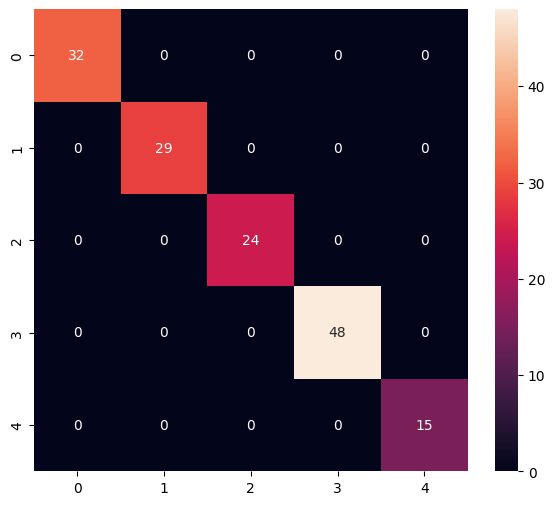

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        15

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [94]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [95]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/mp/t652qdvn7mv2nxpjrf1vssd40000gn/T/tmpo71c44qn/assets


INFO:tensorflow:Assets written to: /var/folders/mp/t652qdvn7mv2nxpjrf1vssd40000gn/T/tmpo71c44qn/assets


Saved artifact at '/var/folders/mp/t652qdvn7mv2nxpjrf1vssd40000gn/T/tmpo71c44qn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  14439009088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14439007328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14439017360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14439372704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14439378336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14439376400: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746695934.029250 71103090 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746695934.029426 71103090 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


6616

# Inference test

In [96]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/charlescai/.pyenv/versions/3.10.3/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [97]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [98]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [99]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 144 μs, sys: 43 μs, total: 187 μs
Wall time: 196 μs


In [100]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.19730365e-04 2.97849601e-06 5.14449887e-02 7.63657510e-01
 1.84774742e-01]
3
